# Task 1: Business Sales Performance Analytics
## Internship: Future Interns (Data Science & Analytics)
**Goal:** Analyze retail sales data to identify trends, top products, and profitability insights for a business.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.strftime('%b')
df['Year'] = df['Date'].dt.year
df['Month_Num'] = df['Date'].dt.month

if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the dataset:\n", df.isnull().sum())

df.head()

No missing values found in the dataset.


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Month_Num
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Nov,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Feb,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Jan,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,5


--- Revenue by Product Category ---
  Product Category  Total Amount
0      Electronics        156905
1         Clothing        155580
2           Beauty        143515


C:\Users\AMIT SHRIVASTAV\AppData\Local\Temp\ipykernel_21052\2203505461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_analysis, x='Product Category', y='Total Amount', palette='viridis')


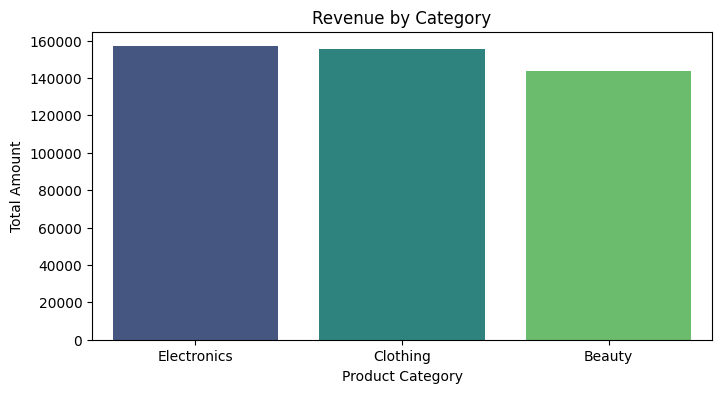

In [4]:
category_analysis = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()

print("--- Revenue by Product Category ---")
print(category_analysis)

plt.figure(figsize=(8,4))
sns.barplot(data=category_analysis, x='Product Category', y='Total Amount', palette='viridis')
plt.title('Revenue by Category')
plt.show()

--- Monthly Sales Trends ---
   Month  Total Amount
0    Jan         36980
1    Feb         44060
2    Mar         28990
3    Apr         33870
4    May         53150
5    Jun         36715
6    Jul         35465
7    Aug         36960
8    Sep         23620
9    Oct         46580
10   Nov         34920
11   Dec         44690


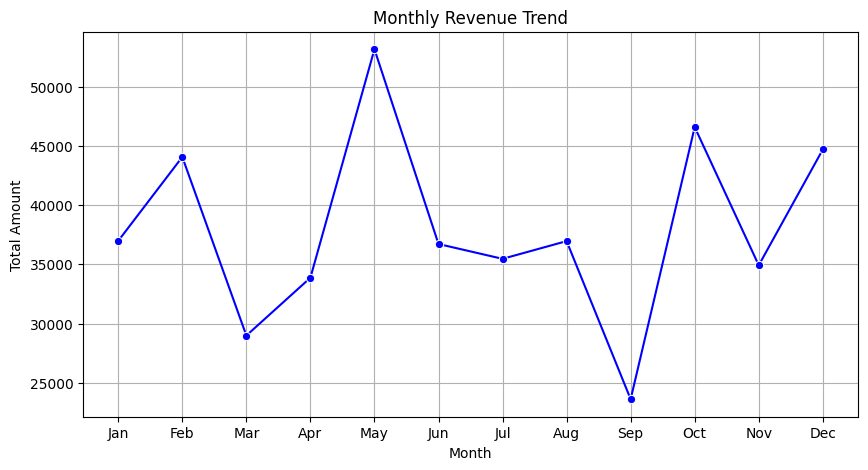

In [5]:
monthly_trends = df.groupby(['Month_Num', 'Month'])['Total Amount'].sum().reset_index()

print("--- Monthly Sales Trends ---")
print(monthly_trends[['Month', 'Total Amount']])


plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_trends, x='Month', y='Total Amount', marker='o', color='b')
plt.title('Monthly Revenue Trend')
plt.grid(True)
plt.show()

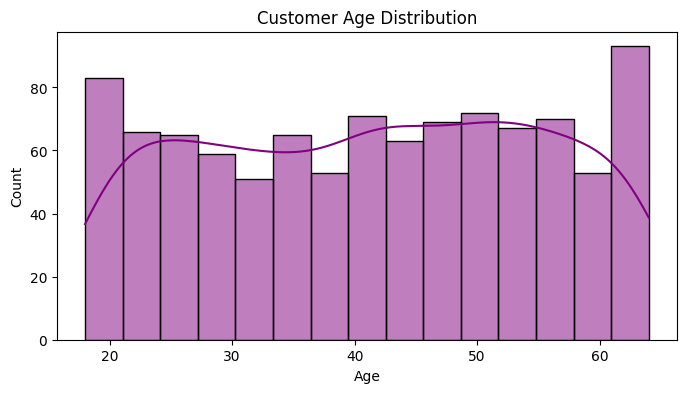

--- Average Spend by Gender ---
   Gender  Total Amount
0  Female    456.549020
1    Male    455.428571


In [6]:
gender_spend = df.groupby('Gender')['Total Amount'].mean().reset_index()


plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=15, kde=True, color='purple')
plt.title('Customer Age Distribution')
plt.show()

print("--- Average Spend by Gender ---")
print(gender_spend)

In [ ]:
df.to_csv('cleaned_retail_data_for_powerbi.csv', index=False)
print("File 'cleaned_retail_data_for_powerbi.csv' is ready for Power BI!")

File 'cleaned_retail_data_for_powerbi.csv' is ready for Power BI!
